# **ADS PROJECT GROUP 3**
## **DATASET:** HOUSING

## **TOPIC QUESTION:**
### What makes a property worth its rent? Uncovering rental price drivers in KL and Selangor.  
## **GROUP MEMBERS:**
1. Nicole Tan (35672951)
2. Christy Lee (34475729)
3. Lee Kar Li (34545824)
4. Nafil (35543167)
5. Heidi Tan (36391158)
6. Bong Min Ge (33608458)
7. Yin Haotian(35427140)




## **PROJECT PROGRESS:**
## 9 April 2025
- A repository in GitHub created by **Lee Kar Li**.
- WhatsApp group created for easier communication among group members
- Dataset uploaded and shared among group members  
- Initial data inspection by all members  
- Variable allocation:
  - **Nicole Tan**: Area, City, Monthly Rental
  - **Christy Lee**: Property Type, Monthly Rental
  - **Lee Kar Li**: Size, Furnished, Monthly Rental
  - **Nafil**: Furnished, Monthly Rental
  - **Heidi Tan**: Completion Year, Monthly Rent
  - **Bong Min Ge**: Facilities, Additional Facilities, Parking, Monthly Rental
  - **Yin Haotian**: Bathroom, Room, Monthly Rental


## 16 April 2025
- Missing data handling and outlier filtering completed by **Nicole Tan**.
- Data visualization techniques discussed as a group

## 23 April 2025
- Draft of individual sections started by all members
- First internal deadline to complete each member's drafting
- Group meeting held to align analysis format and reporting structure

## 30 April 2025
- Group members work on their respective parts.
- A Google Colab file is created by **Nicole Tan** to collaborate all work progress together.
- Group meeting held to follow up every team member's progress.

## 7 May 2025
- Second internal deadline to complete the first version of code and visualisation graphs
- First version of notebook is uploaded to GitHub by **Lee Kar Li**

## 14 May 2025
- Notebook reviewed by Dr. Ashish. Comments given to improve the work.
- Team members worked on improvements for each part.
- Latest version of notebook is submitted by weekend to GitHub by **Lee Kar Li**

## 21 May 2025
- Final visualizations and analysis for all variables completed
- Project notebook organized into clear sections with introduction and conclusion completed.
- Start preparing group presentation slides and poster

## 26 May 2025
- Final version of group presentation slides and poster prepared and reviewed
- All group members finalized and practiced their individual presentation scripts
- Poster is printed out

## 28 May 2025
- Presentation Day
- Final improvements are made from feedbacks during presentation
- Project presentation and poster submitted to Moodle by 1 June 2025
- Project notebook submitted to Moodle by 9 June 2025

## **PROJECT BACKGROUND INFORMATION:**
As urban populations continue to rise in major Malaysian cities like Kuala Lumpur and Selangor, the rental housing market is important in shaping urban living standards and affordability. Understanding the key factors that affect rental rates is essential for tenants, landlords, agents and property investors.

This project investigates rental price drivers in Kuala Lumpur and Selangor using a real-world dataset of housing listings. Each group member explores and compares specific variables or trends, such as location, property type, or facilities provided, to determine the factors that affect a property's rental value.

By analyzing trends in rental prices, we aim to understand what truly makes a property worth its rent.

## **Part 0: Data Information & Importing Data**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import math
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving malaysia_house_rental_price_data.csv to malaysia_house_rental_price_data.csv


In [ ]:
df = pd.read_csv("malaysia_house_rental_price_data.csv")
df.head()

,prop_name,completion_year,monthly_rent,property_type,rooms,parking,bathroom,size,furnished,facilities,additional_facilities,city,area
0,The Hipster @ Taman Desa,2022.0,4200.0,Condominium,5.0,2.0,6.0,1842.0,Fully Furnished,"Minimart, Gymnasium, Security, Playground, Swi...","Air-Cond, Cooking Allowed, Washing Machine",Kuala Lumpur,Taman Desa
1,Segar Courts,NaN,2300.0,Condominium,3.0,1.0,2.0,1170.0,Partially Furnished,"Playground, Parking, Barbeque area, Security, ...","Air-Cond, Cooking Allowed, Near KTM/LRT",Kuala Lumpur,Cheras
2,Pangsapuri Teratak Muhibbah 2,NaN,1000.0,Apartment,3.0,NaN,2.0,650.0,Fully Furnished,"Minimart, Jogging Track, Lift, Swimming Pool",NaN,Kuala Lumpur,Taman Desa
3,Sentul Point Suite Apartment,2020.0,1700.0,Apartment,2.0,1.0,2.0,743.0,Partially Furnished,"Parking, Playground, Swimming Pool, Squash Cou...","Cooking Allowed, Near KTM/LRT, Washing Machine",Kuala Lumpur,Sentul
4,Arte Mont Kiara,NaN,1299.0,Service Residence,1.0,1.0,1.0,494.0,Not Furnished,"Parking, Security, Lift, Swimming Pool, Playgr...",Air-Cond,Kuala Lumpur,Mont Kiara


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19990 entries, 0 to 19989
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   prop_name              18927 non-null  object 
 1   completion_year        10716 non-null  float64
 2   monthly_rent           19873 non-null  float64
 3   property_type          19873 non-null  object 
 4   rooms                  19866 non-null  float64
 5   parking                14190 non-null  float64
 6   bathroom               19868 non-null  float64
 7   size                   19873 non-null  float64
 8   furnished              19870 non-null  object 
 9   facilities             17667 non-null  object 
 10  additional_facilities  13944 non-null  object 
 11  city                   19873 non-null  object 
 12  area                   19873 non-null  object 
dtypes: float64(6), object(7)
memory usage: 2.0+ MB


In [ ]:
df.describe()

,completion_year,monthly_rent,rooms,parking,bathroom,size
count,10716.000000,1.987300e+04,19866.000000,14190.000000,19868.000000,1.987300e+04
mean,2014.788261,2.271422e+03,2.680358,1.416068,1.890829,5.952126e+03
std,6.747486,2.247811e+04,0.809031,0.567741,0.557113,7.093562e+05
min,1977.000000,7.000000e+01,1.000000,1.000000,1.000000,1.000000e+00
25%,2012.000000,1.100000e+03,2.000000,1.000000,2.000000,7.500000e+02
50%,2017.000000,1.400000e+03,3.000000,1.000000,2.000000,8.880000e+02
75%,2020.000000,1.800000e+03,3.000000,2.000000,2.000000,1.044000e+03
max,2025.000000,2.400000e+06,10.000000,10.000000,8.000000,1.000000e+08


In [ ]:
print(df.columns) # Check actual column names
df.isnull().sum() # Check for missing values

Index(['prop_name', 'completion_year', 'monthly_rent', 'property_type',
       'rooms', 'parking', 'bathroom', 'size', 'furnished', 'facilities',
       'additional_facilities', 'city', 'area'],
      dtype='object')


,0
prop_name,1063
completion_year,9274
monthly_rent,117
property_type,117
rooms,124
parking,5800
bathroom,122
size,117
furnished,120
facilities,2323


## **Part 1: Nicole**  
### **Research Question:**
### Which areas in Kuala Lumpur and Selangor have the highest and lowest average rents?


### **1.1 Kuala Lumpur Rent Analysis**

#### 1.1.1 Sorting Data

- Cleaned data to include only listings with valid rent and area in Kuala Lumpur.
- Grouped by area to compute average monthly rent.

In [ ]:
df_cleaned = df.dropna(subset=['monthly_rent','area','city'])
df_kl = df_cleaned[df_cleaned['city'].str.strip().str.title() == 'Kuala Lumpur'][['city','area','monthly_rent']]

In [ ]:
kl_avg_rent = df_kl.groupby('area')['monthly_rent'].mean().sort_values(ascending=True)
kl_avg_rent_df = kl_avg_rent.reset_index()
print(kl_avg_rent_df.head(5))
print(kl_avg_rent_df.tail(5))

                    area  monthly_rent
0           Chan Sow Lin    720.000000
1                Serdang    823.333333
2                Jinjang    906.444444
3   Bandar Tasik Selatan    961.538462
4          Salak Selatan    966.666667
             area  monthly_rent
55           KLCC   3968.152482
56    Wangsa Maju   4350.131749
57         Ampang   4447.148036
58    Bukit Tunku   6800.000000
59   Sri Hartamas  32751.897436


#### 1.1.2 Data Visualisation




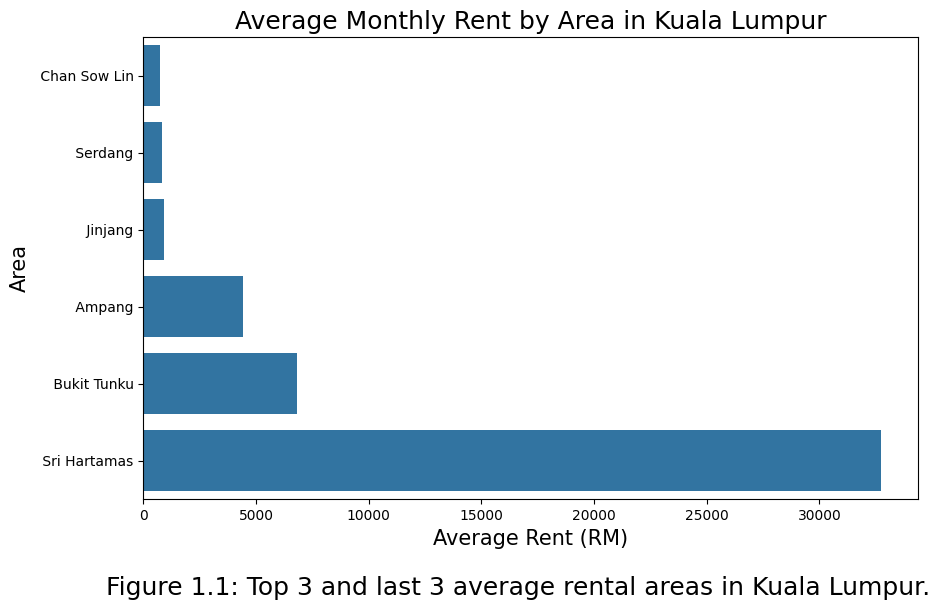

In [ ]:
# Show top and last 3 areas that have highest average monthly rent in Kuala Lumpur
top_bottom_3_kl = pd.concat([kl_avg_rent_df.head(3), kl_avg_rent_df.tail(3)])

plt.figure(figsize=(10,6))
sns.barplot(x='monthly_rent', y='area', data=top_bottom_3_kl)
plt.title('Average Monthly Rent by Area in Kuala Lumpur', fontsize=18)
plt.xlabel('Average Rent (RM)', fontsize=15)
plt.ylabel('Area', fontsize=15)

plt.figtext(0.5, -0.05, 'Figure 1.1: Top 3 and last 3 average rental areas in Kuala Lumpur.',
            wrap=True, horizontalalignment='center', fontsize=18)

plt.show()

#### 1.1.3 Data Analysis
**Highest Average Rents:**
1. Sri Hartamas: RM 32751.90
2. Bukit Tunku: RM 6800.00
3. Ampang: RM 4447.15

**Lowest Average Rents:**
1. Chan Sow Lin: RM 720.00
2. Serdang: RM 823.33
3. Jinjang: RM 906.44

##### Analysis for Highest and Lowest Monthly Rental Areas

Area with Highest Average Monthly Rents: Sri Hartamas 
Number of units included in the data set: 78 
-Highest Rent: RM 2400000.00 
-Lowest Rent: RM 1100.00


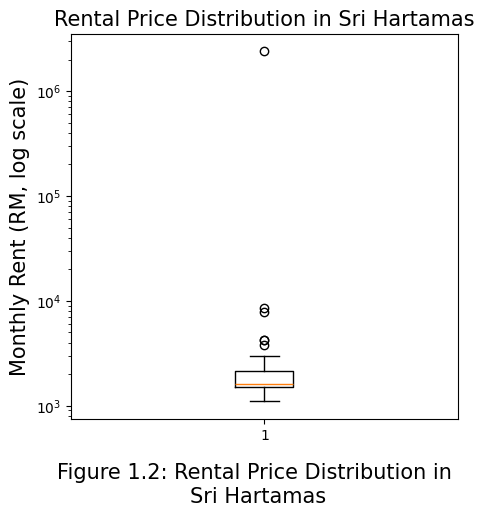

In [ ]:
sri_hartamas = df_kl[df_kl['area'].str.strip().str.title() == 'Sri Hartamas']
sri_hartamas_rents = sri_hartamas['monthly_rent']
sh_count = df_kl[df_kl['area'].str.strip().str.title() == 'Sri Hartamas'].shape[0]

highest_sh = sri_hartamas_rents.max()
lowest_sh = sri_hartamas_rents.min()

print(f"Area with Highest Average Monthly Rents: Sri Hartamas \nNumber of units included in the data set: {sh_count} \n-Highest Rent: RM {highest_sh:.2f} \n-Lowest Rent: RM {lowest_sh:.2f}")

plt.figure(figsize=(5, 5))
plt.boxplot(sri_hartamas['monthly_rent'])
plt.yscale('log')
plt.title('Rental Price Distribution in Sri Hartamas', fontsize=15)
plt.ylabel('Monthly Rent (RM, log scale)', fontsize=15)

plt.figtext(0.5, -0.05, 'Figure 1.2: Rental Price Distribution in \nSri Hartamas',
            wrap=True, horizontalalignment='center', fontsize=15)

plt.show()

In [ ]:
chan_sow_lin = df_kl[df_kl['area'].str.strip().str.title() == 'Chan Sow Lin']
chan_sow_lin_rents = chan_sow_lin['monthly_rent']
csl_count = df_kl[df_kl['area'].str.strip().str.title() == 'Chan Sow Lin'].shape[0]

highest_csl = chan_sow_lin_rents.max()
lowest_csl = chan_sow_lin_rents.min()

print(f"Area with Lowest Average Monthly Rents: Chan Sow Lin \nNumber of units included in the data set: {csl_count} \n-Highest Rent: RM {highest_csl:.2f} \n-Lowest Rent: RM {lowest_csl:.2f}")


Area with Lowest Average Monthly Rents: Chan Sow Lin 
Number of units included in the data set: 1 
-Highest Rent: RM 720.00 
-Lowest Rent: RM 720.00


##### **Explanations**
Based on **Figure 1.1** and the average monthly rents for each area, **Sri Hartamas** has the **highest average rent** in Kuala Lumpur at **RM 32751.90**. Looking closer on **Figure 1.2**, this average is based on 78 units, with monthly rents ranging from RM 1,100.00 to RM 2,400,000.00. This shows a significant variance in rental prices in Sri Hartamas.

In contrast, **Chan Sow Lin** has the **lowest average rent** in Kuala Lumpur at **RM 720.00**. However, this figure is based on a single listing, i.e. only one unit from Chan Sow Lin is included in the analysis of this figure. Therefore, the average is not representative of broader trends in this area.

### **1.2 Selangor Rent Analysis**


#### 1.2.1 Sorting Data

- Cleaned data to include only listings with valid rent and area in Selangor.
- Grouped by area to compute average monthly rent.

In [ ]:
df_sel = df_cleaned[df_cleaned['city'].str.strip().str.title() == 'Selangor'][['city','area','monthly_rent']]

In [ ]:
sel_avg_rent = df_sel.groupby('area')['monthly_rent'].mean().sort_values(ascending=True)
sel_avg_rent_df = sel_avg_rent.reset_index()
print(sel_avg_rent_df.head(5))
print(sel_avg_rent_df.tail(5))

            area  monthly_rent
0        Banting    611.666667
1       Serendah    633.333333
2   Bukit Subang    650.000000
3   Puncak Jalil    700.000000
4   Salak Tinggi    700.000000
             area  monthly_rent
61   Kuala Langat   3475.830508
62    Subang Jaya   3502.437984
63         Ampang   4315.576220
64         Gombak  11149.088889
65       Beranang  13580.000000


#### 1.2.2 Data Visualisation

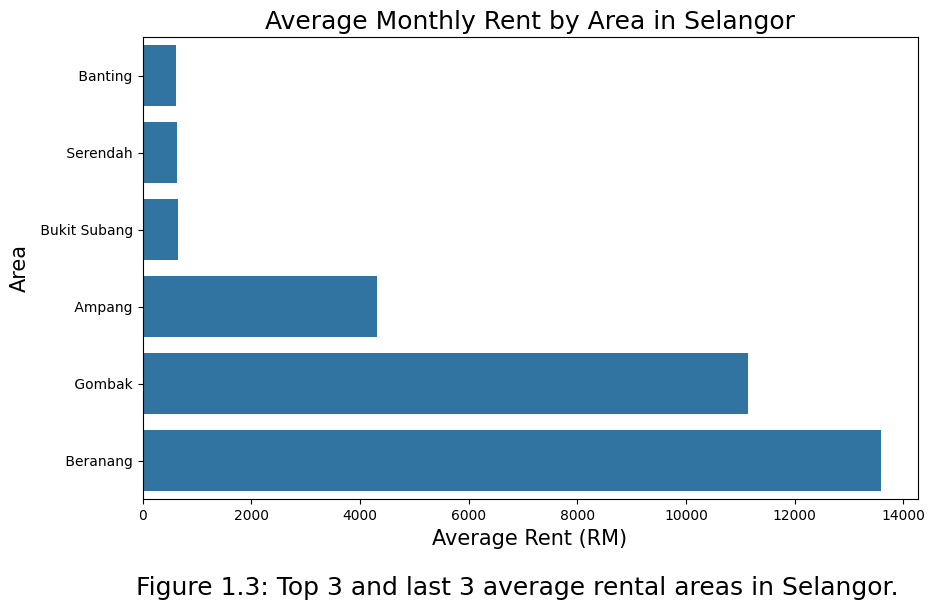

In [ ]:
# Show top and last 3 areas that have highest average monthly rent in Selangor
top_bottom_3_sel = pd.concat([sel_avg_rent_df.head(3), sel_avg_rent_df.tail(3)])

plt.figure(figsize=(10,6))
sns.barplot(x='monthly_rent', y='area', data=top_bottom_3_sel)
plt.title('Average Monthly Rent by Area in Selangor', fontsize=18)
plt.xlabel('Average Rent (RM)', fontsize=15)
plt.ylabel('Area', fontsize=15)

plt.figtext(0.5, -0.05, 'Figure 1.3: Top 3 and last 3 average rental areas in Selangor.',
            wrap=True, horizontalalignment='center', fontsize=18)

plt.show()

#### 1.2.3 Data Analysis
**Highest Average Rents:**
1. Beranang	RM 13580.00
2. Gombak RM 11149.09
3. Ampang RM 4315.58

**Lowest Average Rents:**
1. Banting RM 611.67
2. Serendah	RM 633.33
3. Bukit Subang	RM 650.00

##### Analysis for Highest and Lowest Monthly Rental Areas

Area with Highest Average Monthly Rents: Beranang 
Number of units included in the data set: 8 
-Highest Rent: RM 105000.00 
-Lowest Rent: RM 270.00


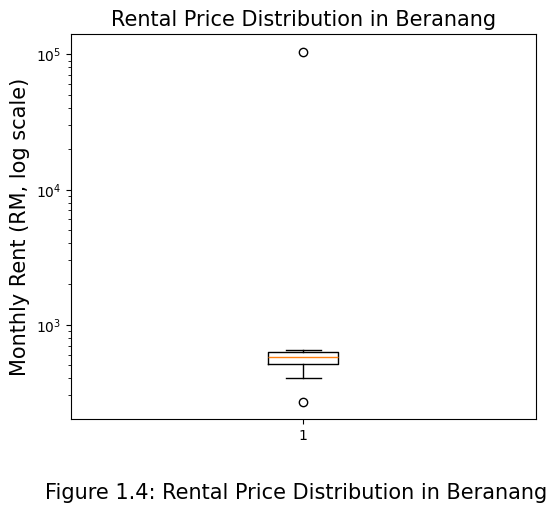

In [ ]:
beranang = df_sel[df_sel['area'].str.strip().str.title() == 'Beranang']
beranang_rents = beranang['monthly_rent']
br_count = beranang.shape[0]

highest_br = beranang_rents.max()
lowest_br = beranang_rents.min()

print(f"Area with Highest Average Monthly Rents: Beranang \nNumber of units included in the data set: {br_count} \n-Highest Rent: RM {highest_br:.2f} \n-Lowest Rent: RM {lowest_br:.2f}")

plt.figure(figsize=(6, 5))
plt.boxplot(beranang['monthly_rent'])
plt.yscale('log')
plt.title('Rental Price Distribution in Beranang', fontsize=15)
plt.ylabel('Monthly Rent (RM, log scale)', fontsize=15)

plt.figtext(0.5, -0.05, 'Figure 1.4: Rental Price Distribution in Beranang',
            wrap=True, horizontalalignment='center', fontsize=15)

plt.show()

In [ ]:
banting = df_sel[df_sel['area'].str.strip().str.title() == 'Banting']
banting_rents = banting['monthly_rent']
bt_count = banting.shape[0]

highest_bt = banting_rents.max()
lowest_bt = banting_rents.min()

print(f"Area with Lowest Average Monthly Rents: Banting \nNumber of units included in the data set: {bt_count} \n-Highest Rent: RM {highest_bt:.2f} \n-Lowest Rent: RM {lowest_bt:.2f}")

Area with Lowest Average Monthly Rents: Banting 
Number of units included in the data set: 6 
-Highest Rent: RM 700.00 
-Lowest Rent: RM 270.00


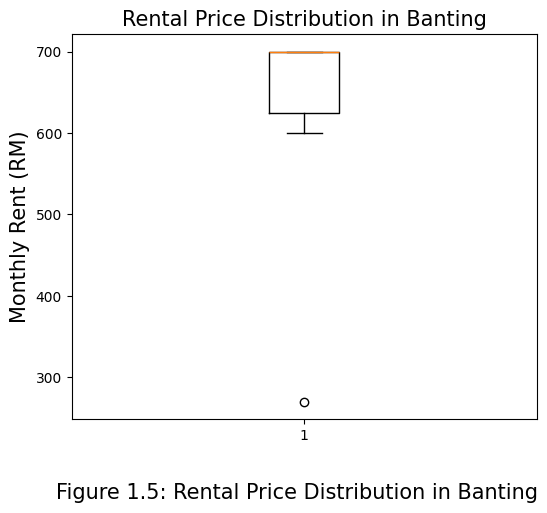

In [ ]:
plt.figure(figsize=(6, 5))
plt.boxplot(banting['monthly_rent'])
plt.title('Rental Price Distribution in Banting', fontsize=15)
plt.ylabel('Monthly Rent (RM)', fontsize=15)

plt.figtext(0.5, -0.05, 'Figure 1.5: Rental Price Distribution in Banting',
            wrap=True, horizontalalignment='center', fontsize=15)

plt.show()

##### **Explanations**
Based on Figure 1.3 and the average monthly rents for each area, **Beranang** has the **highest average rent** in Selangor at **RM 13580.00**. Looking closer at Figure 1.4, this average is based on 8 units, with monthly rents ranging from RM 270.00 to RM 105,000.00. This shows a significant variance in rental prices in Beranang.

In contrast, Figure 1.5 shows that **Banting** has the **lowest average rent** in Selangor at **RM 611.67**. This average is based on 8 units, with monthly rents ranging from RM 270.00 to RM 700.00.

### **Conclusion**

**Kuala Lumpur**
Highest Average Monthly Rents: **Sri Hartamas** (RM 32751.90)  
Lowest Average Monthly Rents: **Chan Sow Lin** (RM 720.00)  

**Selangor**
Highest Average Monthly Rents: **Beranang** (RM 13580.00)  
Lowest Average Monthly Rents: **Banting** (RM 611.67)  

## **Part 2: Christy**  
### **Research Question:**
### Which property types are associated with the highest average rents?


###2.1 Sorting Data
- Cleaned data to include only listings with valid rent and property type.

In [ ]:
# Drop rows with missing monthly_rent
df_clean = df.dropna(subset=['monthly_rent','property_type'])

- Remove outliers

In [ ]:
# Remove outliers from monthly_rent
Q1 = df_clean['monthly_rent'].quantile(0.25)
Q3 = df_clean['monthly_rent'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df_clean[(df_clean['monthly_rent'] >= lower_bound) & (df_clean['monthly_rent'] <= upper_bound)]

# Remove outliers from property_type
type_counts = df_clean["property_type"].value_counts()
outlier_types = type_counts[type_counts == 1].index
df_clean = df_clean[~df_clean["property_type"].isin(outlier_types)]

- Grouped by property type to compute average monthly rent.

In [ ]:
# Calculate average rent by property type
avg_rent_by_type = df_clean.groupby('property_type')['monthly_rent'].mean().sort_values(ascending=False)

### 2.2 Data Visualisation

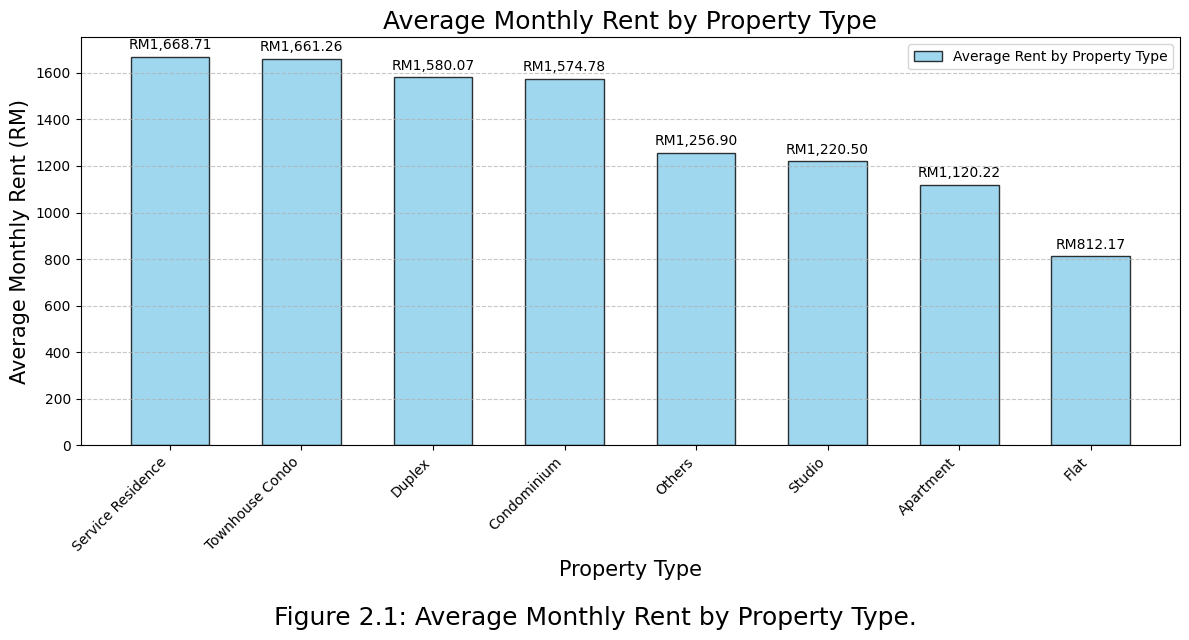

In [ ]:
property_types = avg_rent_by_type.index.tolist()  # Gets the property types as a list
avg_rents = avg_rent_by_type.values.tolist()     # Gets the average rents as a list

plt.figure(figsize=(12, 6))

bars = plt.bar(property_types, avg_rents,
        width=0.6,
        color='skyblue',
        label="Average Rent by Property Type",
        edgecolor='black',
        linewidth=1,
        alpha=0.8)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.,
             height + 20,  # 20 units above the bar
             f'RM{height:,.2f}',  # Format with comma and 2 decimals
             ha='center',  # horizontal alignment
             va='bottom',  # vertical alignment
             fontsize=10)

plt.title('Average Monthly Rent by Property Type', fontsize=18)
plt.xlabel('Property Type', fontsize=15)
plt.ylabel('Average Monthly Rent (RM)', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.figtext(0.5, -0.05, 'Figure 2.1: Average Monthly Rent by Property Type.',
            wrap=True, horizontalalignment='center', fontsize=18)
plt.show()

### 2.3 Data Analysis
**Highest Average Monthly Rents:**
1. Service Residences	RM 1668.71
2. Townhouse Condo RM1661.26
3. Duplex RM 1580.07

**Lowest Average Monthly Rents:**
1. Flat RM 812.17
2. Apartment	RM 1120.22
3. Studio	RM 1220.50

#### Explanation
Based on Figure 2.1, it is clear that **service residences** have the **highest average monthly rent** at **RM 1668.71**, making them the most expensive property type on average. This is followed by **townhouse condos** at **RM 1661.26** and **duplexes** at **RM 1580.07**.

On the contrary, **flats** have the **lowest average monthly rent** at **RM 812.17**. This is followed by **apartments** at **RM 1120.22** and **studios** at **RM 1220.50**.

These results show that **modern high-rise properties** such as service residences, townhouse condos and duplexes have **higher average monthly rent** compared to **economical housing types** such as flats, apartments and studios.

The **difference** between the highest average rent (RM 1668.71) and lowest average rent (RM 812.17) is **RM 856.54**. This indicates a significant variation in rental prices depending on property types.

## **Part 3: Lee Kar Li**
### **Research Question:**
### Does property size influence monthly rent significantly?

In this part, we explore whether property size significantly influences monthly rental prices using Malaysian property data.

We will:
- Clean and prepare the data
- Visualize the relationship between property size and rent
- Apply linear regression and correlation analysis
- Interpret results to support our conclusion

###3.1 Sorting Data
In this section, we clean the dataset by:
- Removing missing values for rent and size
- Filtering out outliers (very small/large sizes and very low/high rents)

This ensures that the data is accurate and consistent for analysis.

In [ ]:
# Preview data
df.info()
df.head()

# Check actual column names
print(df.columns)

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing rent or size values
df_clean = df.dropna(subset=["monthly_rent", "size"])

# Display the shape after cleaning
df_clean.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19990 entries, 0 to 19989
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   prop_name              18927 non-null  object 
 1   completion_year        10716 non-null  float64
 2   monthly_rent           19873 non-null  float64
 3   property_type          19873 non-null  object 
 4   rooms                  19866 non-null  float64
 5   parking                14190 non-null  float64
 6   bathroom               19868 non-null  float64
 7   size                   19873 non-null  float64
 8   furnished              19870 non-null  object 
 9   facilities             17667 non-null  object 
 10  additional_facilities  13944 non-null  object 
 11  city                   19873 non-null  object 
 12  area                   19873 non-null  object 
dtypes: float64(6), object(7)
memory usage: 2.0+ MB
Index(['prop_name', 'completion_year', 'monthly_rent', 'pro

(19873, 13)

###3.2 Data Visualisation
This section provides visual representations of the data:
- Scatter plots to show relationships between size and rent

These plots help us visually assess patterns and identufy influential features.


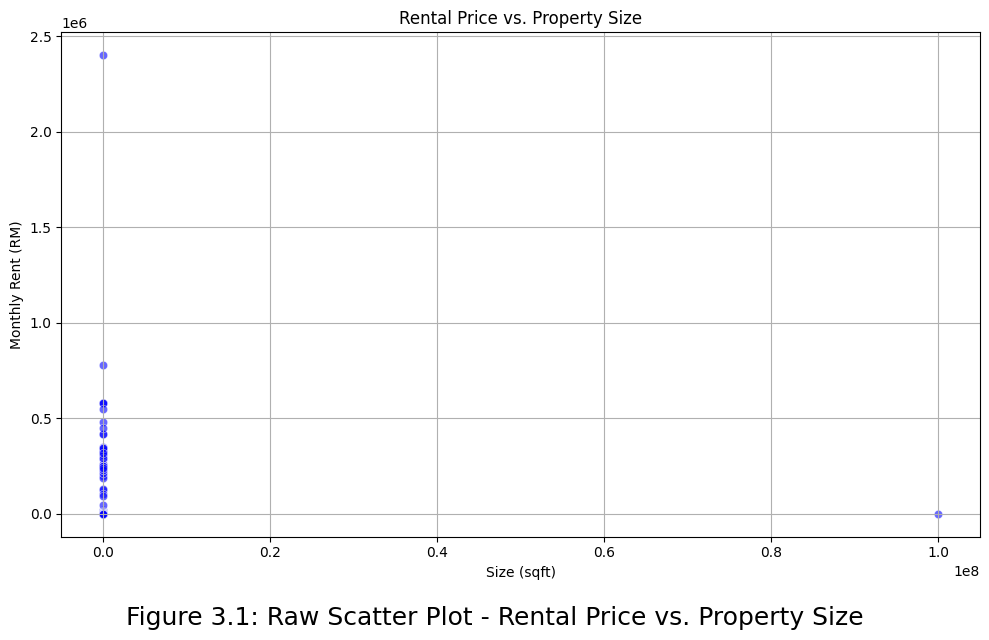

In [ ]:
# Initial visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(color='blue', data=df_clean, x="size", y="monthly_rent", alpha=0.6)
plt.title('Rental Price vs. Property Size')
plt.xlabel('Size (sqft)')
plt.ylabel('Monthly Rent (RM)')
plt.grid(True)
plt.tight_layout()
plt.figtext(0.5, -0.05, 'Figure 3.1: Raw Scatter Plot - Rental Price vs. Property Size',
            wrap=True, horizontalalignment='center', fontsize=18)
plt.show()


In **Figure 3.1**, we observe a **very wide spread** of data points. Some small-sized properties have high rents, and some large-sized properties have relatively low rents.
This suggests that **size alone does not fully explain rent rent variation**--likely due to noise or other influential features like location or furnishing. The pattern looks very clouded, with **no clear linear trend**, highlighting the need for filtering or further analysis.

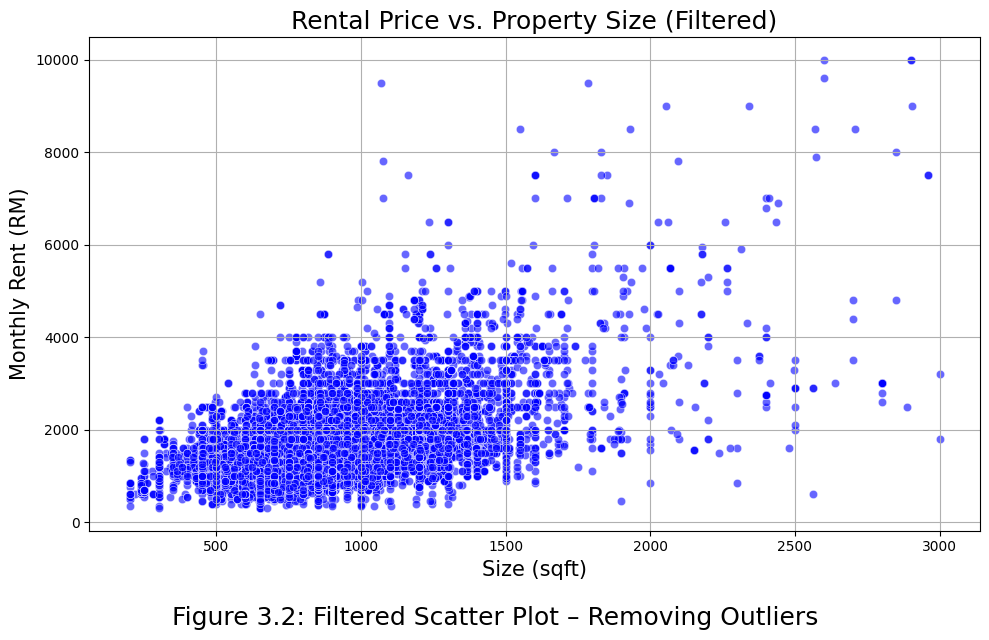

In [ ]:
# Remove outliers for size and monthly rent
df_filtered = df_clean[(df_clean['size'] >= 200) & (df_clean['size'] <= 3000)]
df_filtered = df_filtered[(df_filtered['monthly_rent'] >= 300) & (df_filtered['monthly_rent'] <= 10000)]

# Plot after filtering
plt.figure(figsize=(10, 6))
sns.scatterplot(color='blue', data=df_filtered, x="size", y="monthly_rent", alpha=0.6)
plt.title('Rental Price vs. Property Size (Filtered)', fontsize=18)
plt.xlabel('Size (sqft)', fontsize=15)
plt.ylabel('Monthly Rent (RM)', fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.figtext(0.5, -0.05, 'Figure 3.2: Filtered Scatter Plot – Removing Outliers',
            wrap=True, horizontalalignment='center', fontsize=18)
plt.show()

In **Figure 3.2**, after removing extreme values (very small/large sizes or very low/high rents), the relationship becomes **clearer**.
A **positive trend** appears: **as property size increases, rental prices tend to increases**. However, there's still variability -- indicating other factors are at play, but now the effect of size is more visible.

###3.3 Data Analysis
Here we perform:
- Regression analysis to quantify the relationship between variables
- Final conclusions based on the findings  

We summarize how size and furnishing influence rent, and reflect on real-world implications.

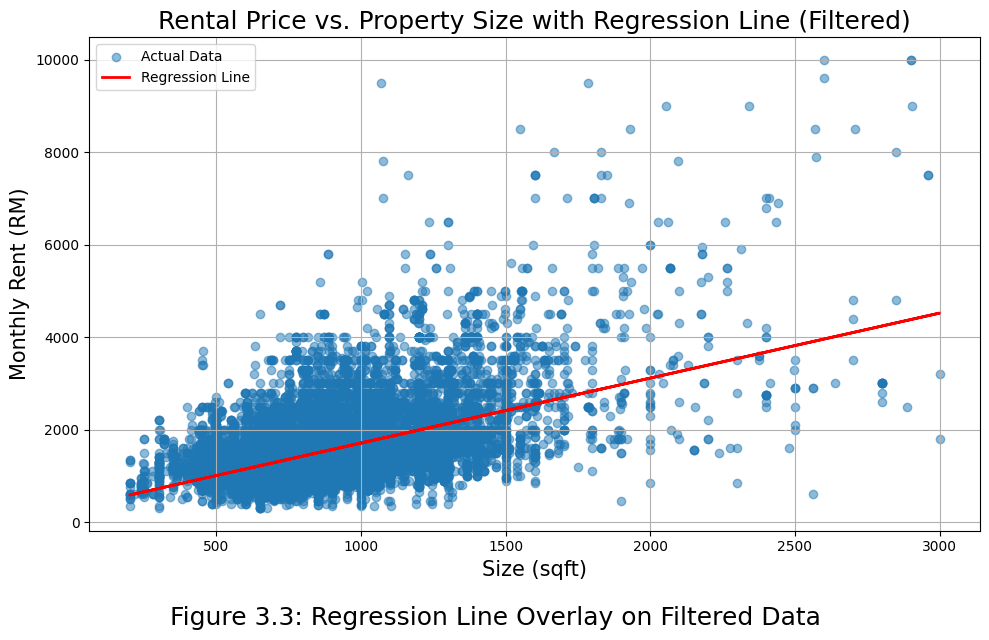

Correlation coefficient: 0.5032
p-value: 0.0
Regression slope: 1.4049
Regression intercept: 306.44
R-squared: 0.2532


In [ ]:
# Fit regression model
model = LinearRegression()
X = df_filtered[['size']]
y = df_filtered['monthly_rent']
model.fit(X, y)
y_pred = model.predict(X)

# Calculate correlation
corr, p_value = pearsonr(df_filtered['size'], df_filtered['monthly_rent'])

# Plot with actual data as scatter
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Actual Data')

# Plot the regression line
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')

# Add labels and styling
plt.legend()
plt.title('Rental Price vs. Property Size with Regression Line (Filtered)', fontsize=18)
plt.xlabel('Size (sqft)', fontsize=15)
plt.ylabel('Monthly Rent (RM)', fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.figtext(0.5, -0.05, 'Figure 3.3: Regression Line Overlay on Filtered Data',
            wrap=True, horizontalalignment='center', fontsize=18)
plt.show()

# Print statistics
print("Correlation coefficient:", round(corr, 4))
print("p-value:", round(p_value, 4))
print("Regression slope:", round(model.coef_[0], 4))
print("Regression intercept:", round(model.intercept_, 2))
print("R-squared:", round(model.score(X, y), 4))

**Figure 3.3** overlays a **linear regression line** on the filtered data. The red line confirms a **moderate positive linear relationship** between size and rent.
From this, we conclude that **rent increases by approximately RM1.40 per additional square foot**. The scatter of points around the line indicates there's still noise or other unexplained variation.

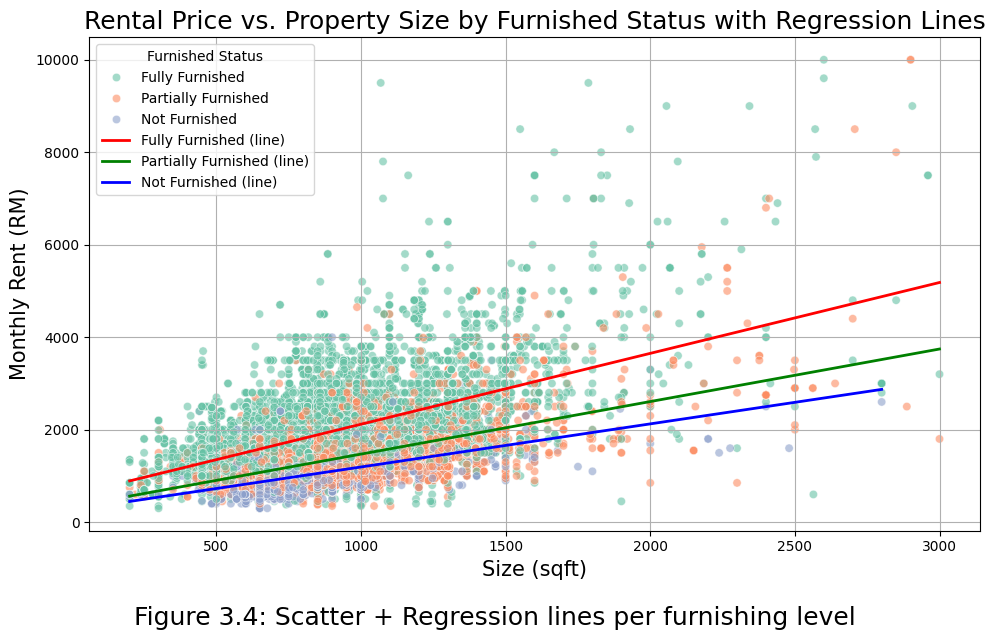

In [ ]:
# Drop missing values
df_furnish_plot = df_filtered.dropna(subset=['furnished'])

# Plot: Scatter points
plt.figure(figsize=(10, 6))
sns.scatterplot(palette='Set2', data=df_furnish_plot, x="size", y="monthly_rent", hue="furnished", alpha=0.6)

# Loop through each furnished status
furnish_levels = df_furnish_plot['furnished'].unique()
colors = ['red', 'green', 'blue']  # custom colors for lines (you can adjust)

for i, status in enumerate(furnish_levels):
    sub_df = df_furnish_plot[df_furnish_plot['furnished'] == status]
    X_sub = sub_df[['size']]
    y_sub = sub_df['monthly_rent']

    # Fit regression model
    model = LinearRegression()
    model.fit(X_sub, y_sub)

    # Predict for line using correct feature name
    x_range = np.linspace(X_sub['size'].min(), X_sub['size'].max(), 100)
    x_range_df = pd.DataFrame(x_range, columns=['size'])  # Create DataFrame with correct column name
    y_pred = model.predict(x_range_df)

    # Plot regression line
    plt.plot(x_range, y_pred, color=colors[i], linewidth=2, label=f'{status} (line)')

# Labels and styling
plt.title('Rental Price vs. Property Size by Furnished Status with Regression Lines', fontsize=18)
plt.xlabel('Size (sqft)', fontsize=15)
plt.ylabel('Monthly Rent (RM)', fontsize=15)
plt.grid(True)
plt.legend(title='Furnished Status')
plt.tight_layout()
plt.figtext(0.5, -0.05, 'Figure 3.4: Scatter + Regression lines per furnishing level',
            wrap=True, horizontalalignment='center', fontsize=18)
plt.show()



**Figure 3.4** shows the relationship between property size and monthly rent, grouped by furnishing status:
- Not Furnished
- Partially Furnished
- Fully Furnished

We observe a consistent positive relationship between size and rent across all furnishing levels, meaning larger properties tend to have higher rents regardless of their furnishing.

Vertical Separation of Regression Lines:
- The Fully Furnished line is generally the highest.
- The Not Furnished line is the lowest, and Partially Furnished is in between
- This shows that furnishing level significantly raises rental price, even for the same size.

We can conclude that the effect of size is consistent, but furnishing shifts the baseline rent higher.

###Conclusion:
After filtering out extreme values, we observed a **moderate positive correlation** (r ≈ 0.5) between property size and monthly rent. The regression analysis indicates:

- **For every 1 sqft increase**, the rent increases by approximately **RM 1.40**.
- The **R-squared value (0.25)** suggests that 25% of rent variation is explained by property size.

Thus, property size **does significantly influence** rental price — although other factors like location, property type, and furnishing likely contribute too.

This analysis investigates whether **property size influences monthly rent** using real Malaysian property rental data. After cleaning the data, filtering outliers, and visualizing the relationships, we perform both **simple and multivariate linear regression** to assess the significance of various features.

We find that property size has a **moderate positive effect** on rent, but other features like **property type** and **furnishing status** also play key roles. A final multivariate regression offers improved predictive accuracy, supporting a more complete model for rental valuation.

## **Part 4: Nafil**
### **Research Question:**
### Does furnishing make a significant impact to monthly rent?

### 4.1 Sorting Data

- Cleaning Data

In [ ]:
df_cleaned = df.dropna(subset=['monthly_rent', 'furnished'])

In [ ]:
fur = 'furnished'
rent = 'monthly_rent'
df_fur = df_cleaned[[fur, rent]]

- removing outliers

In [ ]:
Q1 = df_cleaned['monthly_rent'].quantile(0.25)
Q3 = df_cleaned['monthly_rent'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df_cleaned[(df_cleaned['monthly_rent'] >= lower_bound) & (df_cleaned['monthly_rent'] <= upper_bound)]

### 4.2 Data Visualisation

In [ ]:
df_avg_fur = df_cleaned.groupby("furnished")["monthly_rent"].mean().sort_values(ascending=False)
df_avg_fur = df_avg_fur.reset_index()
df_avg_fur

,furnished,monthly_rent
0,Fully Furnished,2753.050072
1,Partially Furnished,2071.572487
2,Not Furnished,1576.780370


<ipython-input-161-8901862bc8fa>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_avg_fur, x='furnished', y='monthly_rent', palette='Set1')


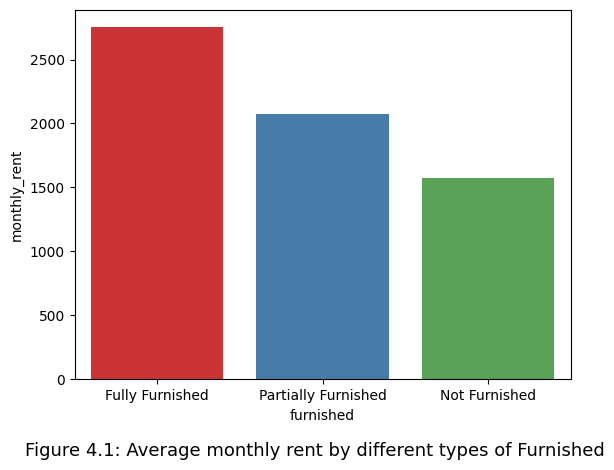

In [ ]:
sns.barplot(data=df_avg_fur, x='furnished', y='monthly_rent', palette='Set1')
plt.figtext(0.5, -0.05, 'Figure 4.1: Average monthly rent by different types of Furnished',
            wrap=True, horizontalalignment='center', fontsize=13)
plt.show()

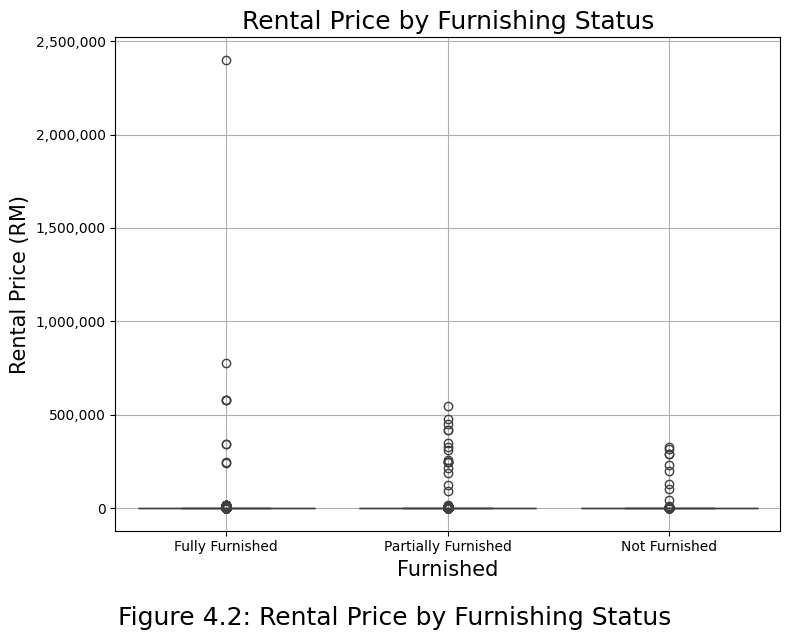

In [ ]:
import matplotlib.ticker as ticker
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_fur, x='furnished', y='monthly_rent')

plt.title('Rental Price by Furnishing Status', fontsize=18)
plt.xlabel('Furnished', fontsize=15)
plt.ylabel('Rental Price (RM)', fontsize=15)
plt.figtext(0.5, -0.05, 'Figure 4.2: Rental Price by Furnishing Status',
            wrap=True, horizontalalignment='center', fontsize=18)

plt.grid(True)

# Disable scientific notation on y-axis
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.tight_layout()
plt.show()

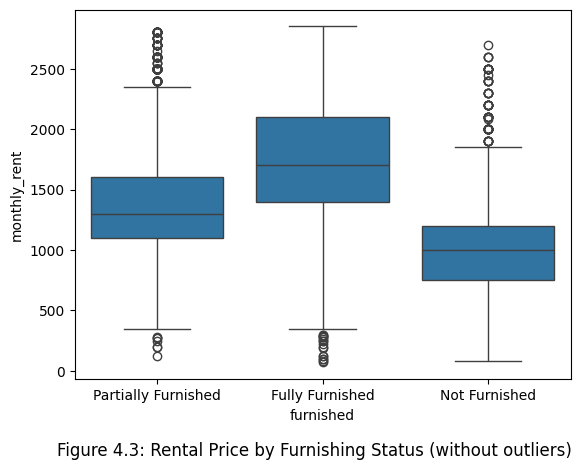

In [ ]:
sns.boxplot(x='furnished',y='monthly_rent',data=df_no_outliers)
plt.figtext(0.5, -0.05, 'Figure 4.3: Rental Price by Furnishing Status (without outliers)',
            wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

In [ ]:
top100_highest = df_fur.nlargest(100, 'monthly_rent')
top100_highest = top100_highest.reset_index()
top100_highest

,index,furnished,monthly_rent
0,4672,Fully Furnished,2400000.0
1,6367,Fully Furnished,780000.0
2,2374,Fully Furnished,580000.0
3,5705,Fully Furnished,580000.0
4,8640,Fully Furnished,580000.0
...,...,...,...
95,1798,Fully Furnished,7500.0
96,2567,Fully Furnished,7500.0
97,3151,Fully Furnished,7500.0
98,3409,Fully Furnished,7500.0


<ipython-input-165-845ead53a2a8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=top100_highest, y='furnished', order=top100_highest['furnished'].value_counts().index, palette='Blues_r')


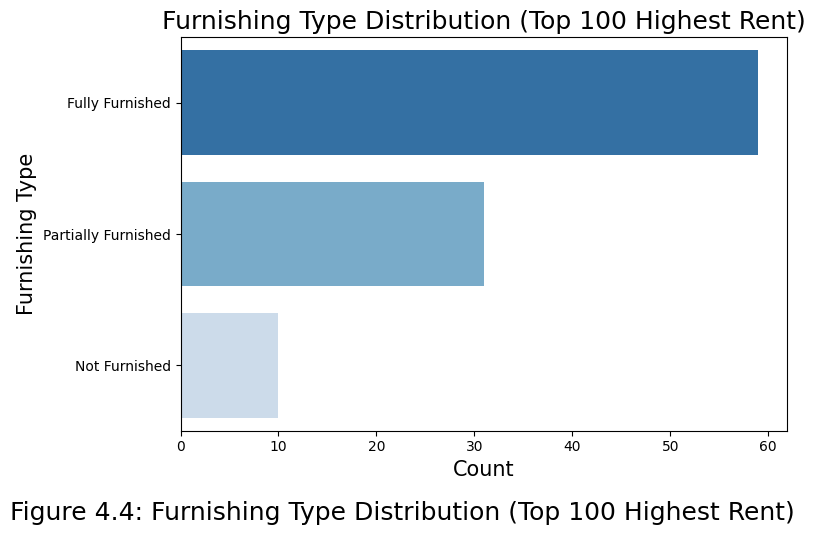

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=top100_highest, y='furnished', order=top100_highest['furnished'].value_counts().index, palette='Blues_r')
plt.title('Furnishing Type Distribution (Top 100 Highest Rent)', fontsize=18)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Furnishing Type', fontsize=15)
plt.tight_layout()
plt.figtext(0.5, -0.05, 'Figure 4.4: Furnishing Type Distribution (Top 100 Highest Rent)',
            wrap=True, horizontalalignment='center', fontsize=18)
plt.show()

In [ ]:
top100_lowest = df_fur.nsmallest(100, 'monthly_rent')
top100_lowest = top100_lowest.reset_index()
top100_lowest

,index,furnished,monthly_rent
0,18711,Fully Furnished,70.0
1,8062,Not Furnished,80.0
2,17145,Fully Furnished,80.0
3,1716,Not Furnished,90.0
4,2621,Fully Furnished,100.0
...,...,...,...
95,10336,Not Furnished,450.0
96,10436,Fully Furnished,450.0
97,10958,Not Furnished,450.0
98,11268,Fully Furnished,450.0


<ipython-input-167-9e6d78223c08>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=top100_lowest, y='furnished', order=top100_lowest['furnished'].value_counts().index, palette='Reds_r')


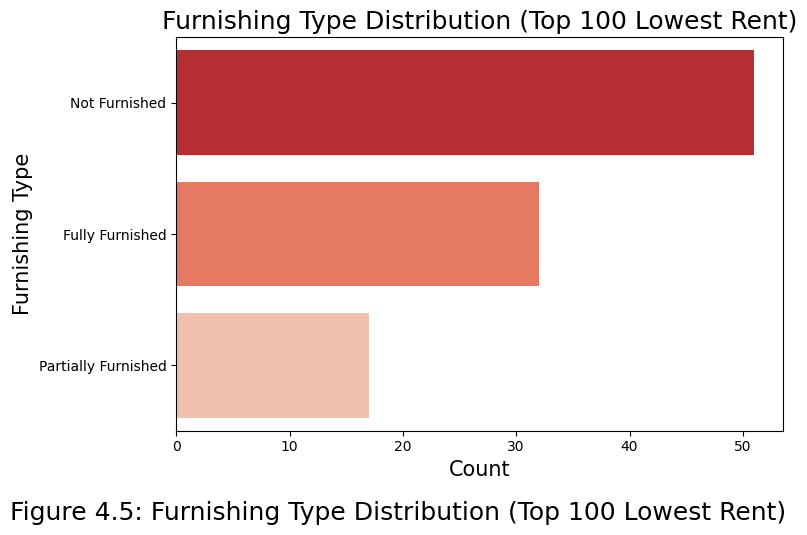

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=top100_lowest, y='furnished', order=top100_lowest['furnished'].value_counts().index, palette='Reds_r')
plt.title('Furnishing Type Distribution (Top 100 Lowest Rent)', fontsize=18)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Furnishing Type', fontsize=15)
plt.tight_layout()
plt.figtext(0.5, -0.05, 'Figure 4.5: Furnishing Type Distribution (Top 100 Lowest Rent)',
            wrap=True, horizontalalignment='center', fontsize=18)
plt.show()

### 4.3 Data Analysis

The analysis focuses on how furnishing status affects rental prices in Malaysia:

- **FIgure 4.1:** Furnished properties consistently command higher average rental prices than unfurnished or partially furnished ones.

- **Figure 4.2:** Price distributions (via boxplots) reveal that furnished units have more price variation, including very high outliers.

- **Figure 4.3:** After removing outliers, the difference in typical rental prices by furnishing type becomes more apparent and easier to compare.

- **Figure 4.4:** Among the top 100 most expensive rentals, the majority are fully furnished, suggesting high-end properties prioritize convenience.

- **Figure 4.5:** In contrast, the cheapest 100 rentals are mostly unfurnished or partially furnished, likely targeting cost-conscious tenants.

### **Explanation:**
The analysis clearly shows that furnishing status plays a significant role in determining rental prices in Malaysia. Fully furnished properties not only command higher average rents but also dominate the upper end of the market. Conversely, unfurnished and partially furnished units are more common among lower-priced rentals. This suggests that tenants are willing to pay a premium for convenience and move-in readiness. For property owners, investing in furnishing may be a strategic way to increase rental value, while renters on a budget may prefer unfurnished options to save costs.

## **Part 5 : Heidi**
### **Research Question :**
### Do newer properties of completion years 2015 and above have higher monthly rents?


### 5.1 Sorting Data


*   Drop observations with missing rental and completion year values
*   Group by completion years to compute average monthly rent



In [ ]:
df_clean = df.dropna(subset=['monthly_rent','completion_year'])

In [ ]:
Q1 = df_clean['monthly_rent'].quantile(0.25)
Q3 = df_clean['monthly_rent'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df_clean[(df_clean['monthly_rent'] >= lower_bound) & (df_clean['monthly_rent'] <= upper_bound)]

# Remove outliers from completion year
type_counts = df_clean["completion_year"].value_counts()
outlier_types = type_counts[type_counts == 1].index
df_clean = df_clean[~df_clean["completion_year"].isin(outlier_types)]

### 5.2 Data Visualisation

In [ ]:
completion_monthly = df.groupby(['completion_year'])[['monthly_rent']].mean() #Calculate the mean rent for each year
completion_monthly = completion_monthly.nlargest(10,'monthly_rent') #Create a table of the top 10 years with the highest monthly rents
completion_monthly.index = completion_monthly.index.astype(int) #Convert the index to integer
completion_monthly

,monthly_rent
completion_year,
2011,18254.256579
2003,5146.459459
2005,4851.439560
2008,4231.879630
2019,4183.864583
1984,3300.000000
2016,2729.997059
2015,2642.605459
2014,2335.300000


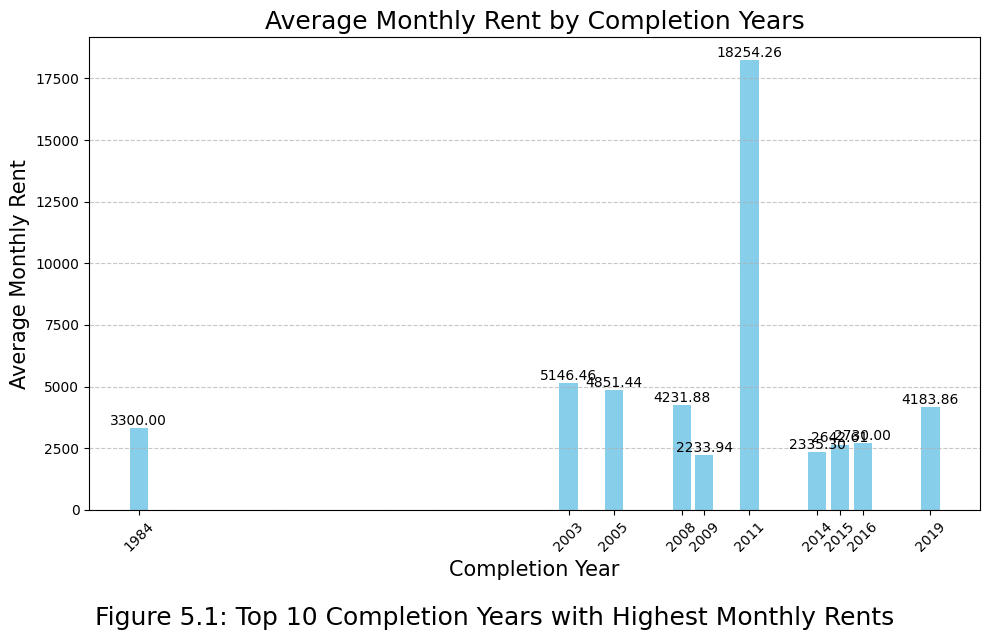

In [ ]:
# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(completion_monthly.index, completion_monthly['monthly_rent'], color='skyblue')

# Add the values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

# Customize the plot
plt.title('Average Monthly Rent by Completion Years', fontsize=18)
plt.xlabel('Completion Year', fontsize=15)
plt.ylabel('Average Monthly Rent', fontsize=15)
plt.xticks(completion_monthly.index, rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.figtext(0.5, -0.05, 'Figure 5.1: Top 10 Completion Years with Highest Monthly Rents',
            wrap=True, horizontalalignment='center', fontsize=18)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

### 5.3 Data Analysis

**Highest monthly rents :**


1.   2011 : RM 18254.26
2.   2003 : RM 5146.46
3. 2005 : RM 4851.44

**Lowest monthly rents :**


1.   2015 : RM 2642.61
2.   2014 : RM 2335.30
3.   2009 : RM 2233.84






### **Explanation:**
Based on Figure 1, the highest monthly rent belongs to properties built in 2011 (RM 18254.26). Meanwhile, properties built in 2009 has the lowest monthly rent among the top 10 highest monthly rents.

Looking at the 10 observations, only properties built in 2015, 2016 and 2019 are included in the top 10 highest rents with monthly rents of RM 2642.61, RM 2730.00 and RM 4183.86, respectively. The rest of the properties were built before 2015. Hence, based on these findings, this shows that properties built before 2015 generally have higher monthly rents.

## **Part 6: Min Ge**
### **Research question:**
### Is there a relationship between the number of listed facilities and the rental price?



### 6.1 Number of facilities

#### 6.1.1 Sorting Data

In [ ]:
df.facilities.unique()

array(['Minimart, Gymnasium, Security, Playground, Swimming Pool, Parking, Lift, Barbeque area, Multipurpose hall, Jogging Track',
       'Playground, Parking, Barbeque area, Security, Jogging Track, Swimming Pool, Gymnasium, Lift, Sauna',
       'Minimart, Jogging Track, Lift, Swimming Pool', ...,
       'Gymnasium, Minimart, Playground, Sauna, Swimming Pool, Squash Court, Lift, Parking, Security, Barbeque area, Multipurpose hall',
       'Security, Parking, Lift, Minimart, Multipurpose hall, Playground, Jogging Track',
       'Jogging Track, Barbeque area, Playground, Swimming Pool, Tennis Court, Sauna'],
      dtype=object)

Since I have to count the number of facilities, I would have to access each string of facilities, then split so I can count the number of facilities.

In [ ]:
df_clean = df.dropna(subset=['monthly_rent', 'facilities'])[['monthly_rent', 'facilities']]
df_clean['facility_counts'] = df_clean['facilities'].apply(lambda x: len([f.strip() for f in x.split(',')]))

Now we remove any outliers present within the cleaned data

In [ ]:
Q1 = df_clean['monthly_rent'].quantile(0.25)
Q3 = df_clean['monthly_rent'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df_clean[(df_clean['monthly_rent'] >= lower_bound) & (df_clean['monthly_rent'] <= upper_bound)]

#### 6.1.2 Data Visualisation

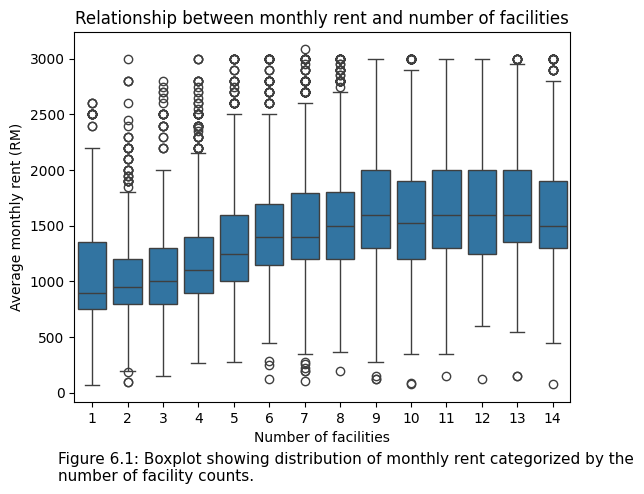

In [ ]:
#boxplot
sns.boxplot(x='facility_counts',y='monthly_rent',data=df_no_outliers)

plt.title('Relationship between monthly rent and number of facilities')
plt.xlabel('Number of facilities')
plt.ylabel('Average monthly rent (RM)')
plt.figtext(0.1, -0.05, 'Figure 6.1: Boxplot showing distribution of monthly rent categorized by the number of facility counts.',
            wrap=True, horizontalalignment='left', fontsize=11)

plt.show()

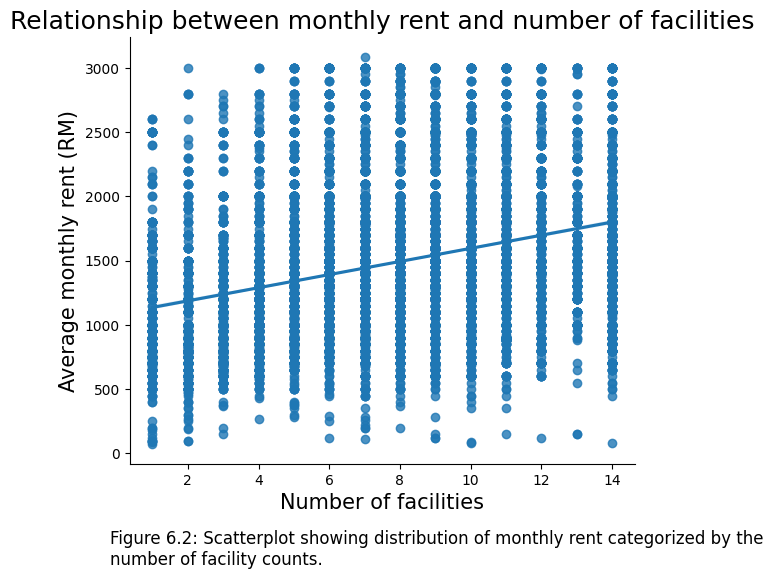

In [ ]:
#scatterplot
sns.lmplot(x='facility_counts', y='monthly_rent', data=df_no_outliers, height=5, aspect=1.2)

plt.title('Relationship between monthly rent and number of facilities', fontsize=18)
plt.xlabel('Number of facilities', fontsize=15)
plt.ylabel('Average monthly rent (RM)', fontsize=15)
plt.figtext(0.1, -0.08, 'Figure 6.2: Scatterplot showing distribution of monthly rent categorized by the number of facility counts.',
            wrap=True, horizontalalignment='left', fontsize=12)

plt.show()

#### 6.1.3 Data Analysis

For the boxplot, even though outliers are supposed to have been removed and we do not expect to see any, there are still outliers observed for most of the variables. This is due to the fact that each variable has different thresholds for outliers, meaning the outliers are based on their respective spread.

From both the boxplot and scatterplot, we can see that there is a positive relationship between the number of facilities and the monthly rent. The trend line in the scatterplot has a positive gradient, showing the positive relationship between number of facilities and rent.



###6.2 Number of total facilities

####6.2.1 Sorting Data

Now we see if calculating total facilities (adding from the variable `additional_facilities`) has any relationship with the rental. We first clean the data using the same method as in part 6: 1.1

In [ ]:
df_clean = df.dropna(subset=['monthly_rent', 'facilities','additional_facilities'])[['monthly_rent', 'facilities','additional_facilities']]

facility_counts = df_clean['facilities'].str.split(',').apply(lambda x: len([f.strip() for f in x]))
additional_counts = df_clean['additional_facilities'].str.split(',').apply(lambda x: len([f.strip() for f in x]))

df_clean['total_facility_counts'] = facility_counts + additional_counts

Then we remove any outliers

In [ ]:
Q1 = df_clean['monthly_rent'].quantile(0.25)
Q3 = df_clean['monthly_rent'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df_clean[(df_clean['monthly_rent'] >= lower_bound) & (df_clean['monthly_rent'] <= upper_bound)]

####6.2.2 Data Visualisation

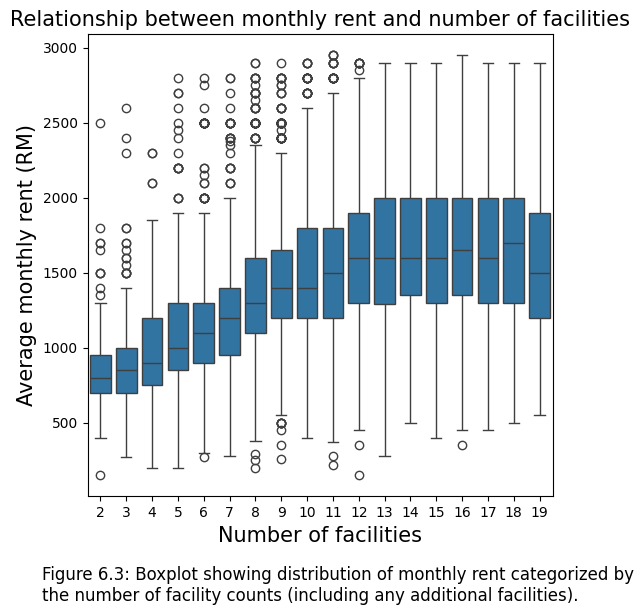

In [ ]:
#boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(x='total_facility_counts',y='monthly_rent',data=df_no_outliers)

plt.title('Relationship between monthly rent and number of facilities', fontsize=15)
plt.xlabel('Number of facilities', fontsize=15)
plt.ylabel('Average monthly rent (RM)', fontsize=15)
plt.figtext(0.05, -0.06, 'Figure 6.3: Boxplot showing distribution of monthly rent categorized by the number of facility counts (including any additional facilities).',
            wrap=True, horizontalalignment='left', fontsize=12)

plt.show()

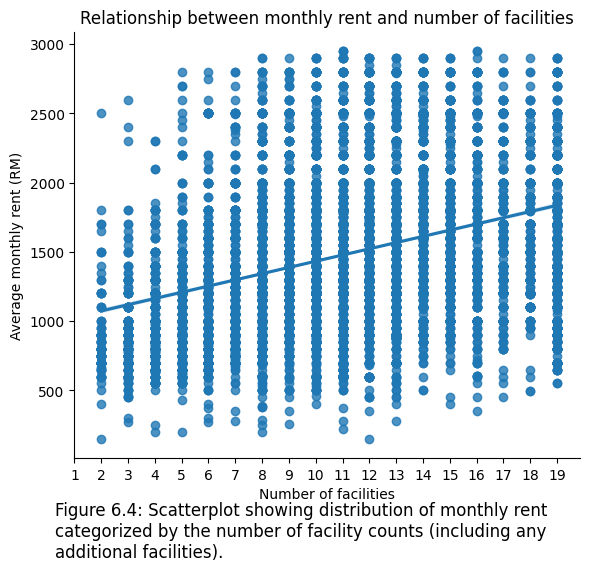

In [ ]:
#scatterplot
sns.lmplot(x='total_facility_counts', y='monthly_rent', data=df_no_outliers, height=5, aspect=1.2)

plt.xticks(range(1,20))
plt.title('Relationship between monthly rent and number of facilities')
plt.xlabel('Number of facilities')
plt.ylabel('Average monthly rent (RM)')
plt.figtext(0.1, -0.075, 'Figure 6.4: Scatterplot showing distribution of monthly rent categorized by the number of facility counts (including any additional facilities).',
            wrap=True, horizontalalignment='left', fontsize=12)
plt.show()

####6.2.3 Data Analysis

There are outliers in the boxplot for the same reason as provided in 1.3

From the boxplot, we can see that the rent increases as number of facilities increases up until 14, which then fluctuates by around 200 until 19. From the scatterplot, the trendline also shows a positive relationship between the total facility counts and monthly rent.

The reason why properties with more facilities have higher rent can be due to convenience and perceived value. As more facilities like gym, nearby public transport, minimart, and so on are present at the residence, the need for residents to travel elsewhere for daily needs is reduced. Thus, this convenience increases the property's attractiveness and demand, allowing landloards to charge higher rent. More facilities may also mean higher management fees, and thus higher rent.
After 14 facilities, the rent fluctuates and no pattern is observed. This suggests market limits or a possible market saturation point. This indicates that beyond a certain number of facilities, the added amenities no longer significantly increase the perceived value of the property.

###6.3 Number of parking

####6.3.1 Sorting Data

First we clean data to remove any empty cells and any outliers

In [ ]:
df_clean_parking = df.dropna(subset=['monthly_rent','parking'])[['monthly_rent','parking']]

Q1 = df_clean_parking['monthly_rent'].quantile(0.25)
Q3 = df_clean_parking['monthly_rent'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_parking_no_outliers = df_clean_parking[(df_clean_parking['monthly_rent'] >= lower_bound) & (df_clean_parking['monthly_rent'] <= upper_bound)]

Looking at the data, it tells us that a property can allocate up to 10 parking spaces, but there are none which provides exactly 8 parking spaces.

####6.3.2 Data Visualisation

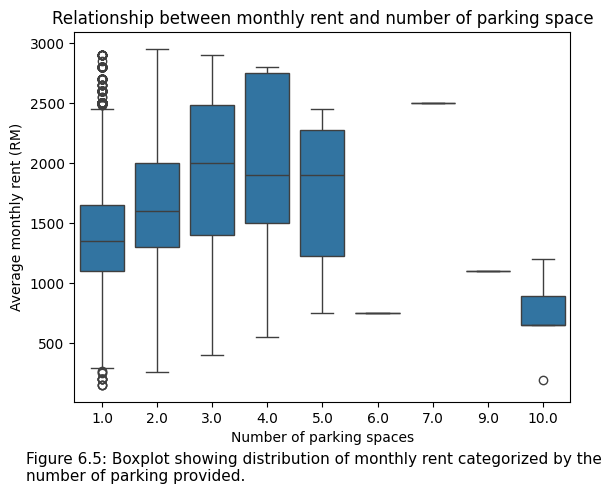

In [ ]:
#boxplot
sns.boxplot(x='parking',y='monthly_rent',data=df_parking_no_outliers)

plt.title('Relationship between monthly rent and number of parking space')
plt.xlabel('Number of parking spaces')
plt.ylabel('Average monthly rent (RM)')
plt.figtext(0.05, -0.05, 'Figure 6.5: Boxplot showing distribution of monthly rent categorized by the number of parking provided.',
            wrap=True, horizontalalignment='left', fontsize=11)

plt.show()

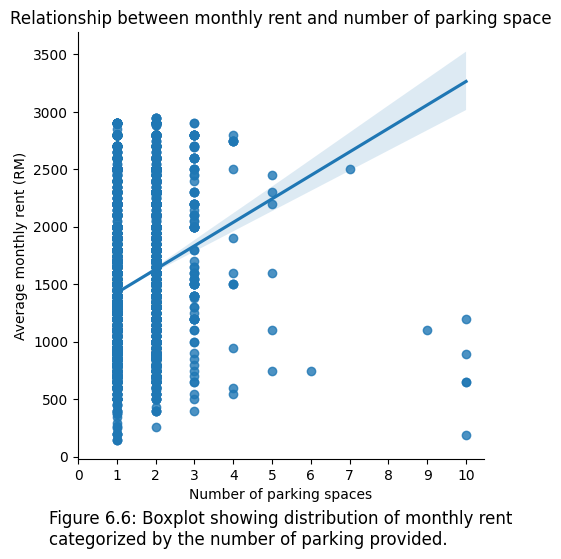

In [ ]:
#scatterplot
sns.lmplot(x='parking', y='monthly_rent', data=df_parking_no_outliers)

plt.xticks(range(0,11))
plt.title('Relationship between monthly rent and number of parking space')
plt.xlabel('Number of parking spaces')
plt.ylabel('Average monthly rent (RM)')
plt.figtext(0.1, -0.05, 'Figure 6.6: Boxplot showing distribution of monthly rent categorized by the number of parking provided.',
            wrap=True, horizontalalignment='left', fontsize=12)

plt.show()

####6.3.3 Data Analysis

From the boxplot, we can see an **increasing trend** in monthly rent and parking from 1-4 parking spaces, starting from 5 there is no pattern, likely because there is only one data for  6, 7, and 9 parking spaces respectively. As there is **no data for 8** numbers of parking and only one data for **6, 7, 9 parking spaces, the visualised data is unreliable** and won't show any pattern. Even if there was any pattern, it would be unreliable.

For the scatterplot, we can see that the trendline has an **increasing gradient**, meaning there is a positive relationship between the number of parking and monthly rent. However as mentioned in the above paragraph, result may be unreliable due to insufficient data at higher parking spaces - this is visualised by the shaded areas around the trendline getting larger as parking spaces increase. The shaded area represents the 95% confidence interval, showing the range within which we expect the true trend to lie. Thus, a **larger area means a larger uncertainty**.

This result shows that more parking spaces will charge **higher rent (only reliable for up to 4 spaces)** as
more parking spaces may mean **larger units**, which will lead to higher rent (moderate positive effect as shown in part 3). Additionally, busy areas might have **limited parking spaces** available, leading to a **higher demand** and importance when looking for properties. Another reason why more parking spaces means higher rent may be **higher security fees**.

### Conclusion:

In conclusion, figures 6.2, 6.4, and 6.6 all show a positivite correlation between the monthly rent and the investigated features. It can be said that as there are more facilities provided, the rent increases up to a certain point (14 facilities), where rent starts fluctuating and there is generally no pattern. From figure 6.5 and 6.6, we see that as there are more parking spaces provided, the higher the rent as there is a positive trendline. However, due to insufficient data, higher parking spaces (5 and above) show no reliable pattern.



## **Part 7 : Yin Haotian**
### **Research Question:**
### How does the number of rooms and bathrooms affect the monthly rent?

1.Data Fixation

### 7.1 Data Cleaning

In [ ]:
df_clean0 = df[['monthly_rent', 'bathroom', 'rooms']].dropna()


df_filtered = df_clean0[
    (df_clean0['monthly_rent'] > 500) &
    (df_clean0['monthly_rent'] < 20000) &
    (df_clean0['bathroom'] >= 0) &
    (df_clean0['rooms'] >= 0)
]
#data cleaning


Explanation: This section cleans and filters the data to remove missing values and retain only valid rent, bathroom, and room entries.

### 7.2 Evaluting and Sorting the value of Pearson's correlation coefficient

In [ ]:
results = []
for feature in ['bathroom', 'rooms']:
    r, p = stats.pearsonr(df_filtered[feature], df_filtered['monthly_rent'])
    results.append({'feature': feature, 'r': r, 'p': p})

result_df = pd.DataFrame(results).sort_values('r', ascending=False)#sort values
print("Correlation between number of rooms/bathrooms and monthly rent:")
print(result_df)


Correlation between number of rooms/bathrooms and monthly rent:
    feature         r              p
0  bathroom  0.407033   0.000000e+00
1     rooms  0.153562  6.605546e-104


Explanation: part calculates and displays the Pearson Correlation between monthly rent and the number of bathrooms or rooms.

### 7.3 Data visualization

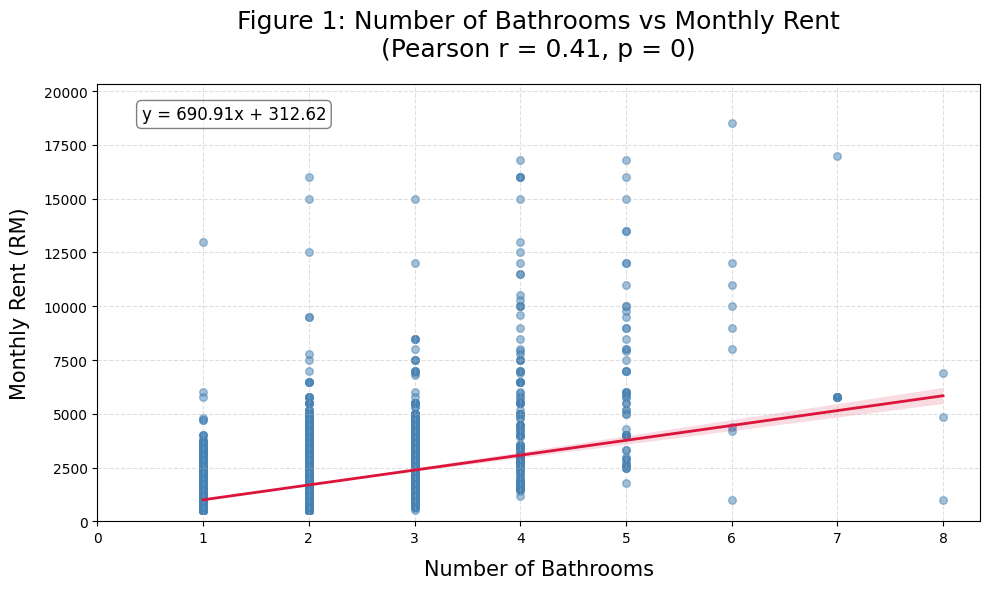

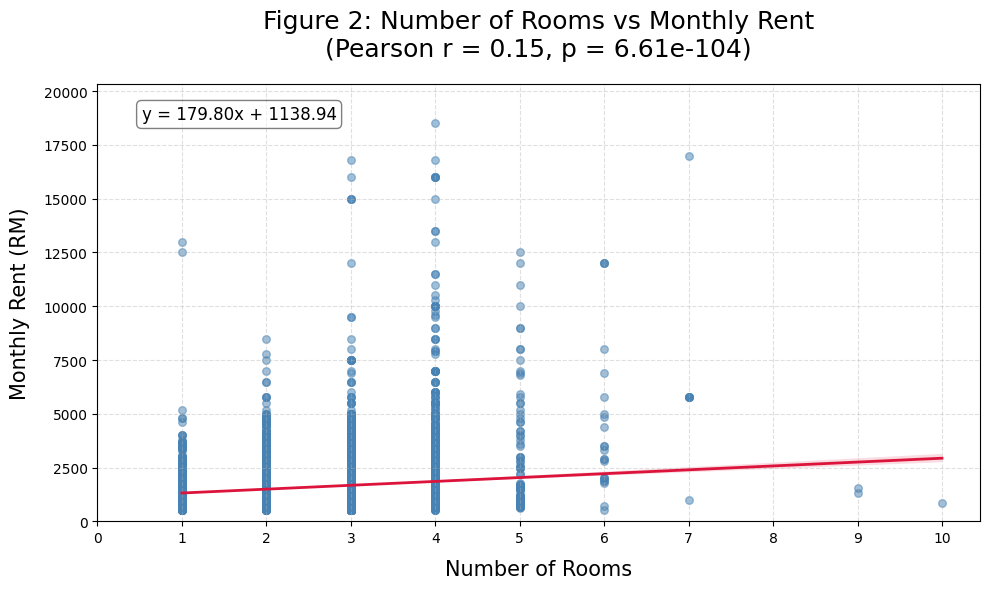

In [ ]:
from scipy import stats
from sklearn.linear_model import LinearRegression

feature_labels = {
    'bathroom': 'Number of Bathrooms',
    'rooms': 'Number of Rooms'
}

for i, feature in enumerate(['bathroom', 'rooms'], start=1):
    plt.figure(figsize=(10, 6))

    # Get x and y values
    X = df_filtered[feature].values.reshape(-1, 1)
    y = df_filtered['monthly_rent'].values

    # Fit linear regression using sklearn
    model = LinearRegression()
    model.fit(X, y)
    slope = model.coef_[0]
    intercept = model.intercept_

    # Pearson correlation
    corr, p_value = stats.pearsonr(df_filtered[feature], df_filtered['monthly_rent'])

    # Plot with seaborn
    sns.regplot(
        x=feature,
        y='monthly_rent',
        data=df_filtered,
        scatter_kws={'alpha': 0.5, 's': 30, 'color': 'steelblue'},
        line_kws={'color': 'crimson', 'linewidth': 2}
    )

    # Display linear equation on plot
    equation_text = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.text(
        0.05, 0.95, equation_text,
        transform=plt.gca().transAxes,
        fontsize=12,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.5)
    )

    # Plot formatting
    plt.title(
        f"Figure {i}: {feature_labels[feature]} vs Monthly Rent\n(Pearson r = {corr:.2f}, p = {p_value:.3g})",
        fontsize=18, pad=20
    )
    plt.xlabel(feature_labels[feature], fontsize=15, labelpad=10)
    plt.ylabel("Monthly Rent (RM)", fontsize=15, labelpad=10)
    plt.xticks(np.arange(0, df_filtered[feature].max() + 1, 1))
    plt.ylim(0, df_filtered['monthly_rent'].max() * 1.1)
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()


Explanation: This section creates scatter plots with regression lines to visualize the relationship between monthly rent and the number of bathrooms or rooms, along with their Pearson correlation values

Figure 1 displays a scatter plot illustrating the relationship between the number of bathrooms in a property and its monthly rent (RM). An upward-sloping linear regression line indicates a positive trend: as the number of bathrooms increases, the monthly rent generally tends to increase.
The Pearson correlation coefficient (r = 0.41) quantifies this as a moderate positive linear relationship. This correlation is statistically highly significant (p = 0), meaning the observed association is unlikely due to random chance.
While the overall trend is clear, considerable variability in rent exists for any given number of bathrooms, particularly for properties with 2 to 5 bathrooms. Despite this dispersion, the data supports that, on average, more bathrooms are associated with higher rental prices.

Figure 2 presents a scatter plot illustrating the relationship between the number of rooms in a property and its monthly rent (RM). A very gently upward-sloping regression line suggests a positive, albeit weak, trend: as the number of rooms increases, monthly rent tends to rise slightly.
The Pearson correlation coefficient (r = 0.15) confirms this weak positive linear association. Despite its weakness, this correlation is highly statistically significant (p = 6.61e-104), indicating the trend is unlikely due to chance.
However, the plot shows considerable dispersion, with a wide range of rental prices observed for any given number of rooms, particularly for properties with 3 to 5 rooms. This suggests other factors heavily influence rent beyond just the room count.

2. Extension of the research(Demonstrates understanding of the Pearson coefficient) calculate the correlation between bathroom and room.

2.1 Define the pearson function

In [ ]:
# Function to manually compute the Pearson correlation coefficient between two lists
def pearson_correlation(x, y):
    mean_x = sum(x) / len(x)
    mean_y = sum(y) / len(y)
    numerator = sum((a - mean_x) * (b - mean_y) for a, b in zip(x, y))  # Covariance
    denominator = math.sqrt(sum((a - mean_x) ** 2 for a in x) * sum((b - mean_y) ** 2 for b in y))  # Product of standard deviations
    return numerator / denominator if denominator != 0 else 0  # Avoid division by zero

# Function to calculate the p-value associated with a Pearson correlation coefficient
def pearson_p_value(r, n):
    if n <= 2:
        return float('nan')  # Not enough data to compute p-value
    t_stat = r * math.sqrt((n - 2) / (1 - r ** 2))  # t-statistic for Pearson correlation
    p = 2 * (1 - normal_cdf(abs(t_stat)))  # Two-tailed p-value using normal approximation
    return p

# Cumulative distribution function for the standard normal distribution
def normal_cdf(x):
    return (1 + math.erf(x / math.sqrt(2))) / 2

# Prepare data for correlation calculation
x = df_filtered['rooms'].tolist()
y = df_filtered['bathroom'].tolist()

# Calculate Pearson correlation coefficient and p-value
r = pearson_correlation(x, y)
p = pearson_p_value(r, len(df_filtered))

# Store results in a DataFrame
correlation_df = pd.DataFrame({
    'feature_1': ['rooms'],
    'feature_2': ['bathroom'],
    'r': [r],
    'p': [p]
})

# Display the correlation result
print("Correlation between number of rooms and number of bathrooms:")
print(correlation_df)


Correlation between number of rooms and number of bathrooms:
  feature_1 feature_2         r    p
0     rooms  bathroom  0.682325  0.0


Explanation: This section defines custom functions to manually calculate the Pearson correlation coefficient and its p-value between the number of rooms and bathrooms, then displays the result in a DaraFrame.

2.2 Data Visualization

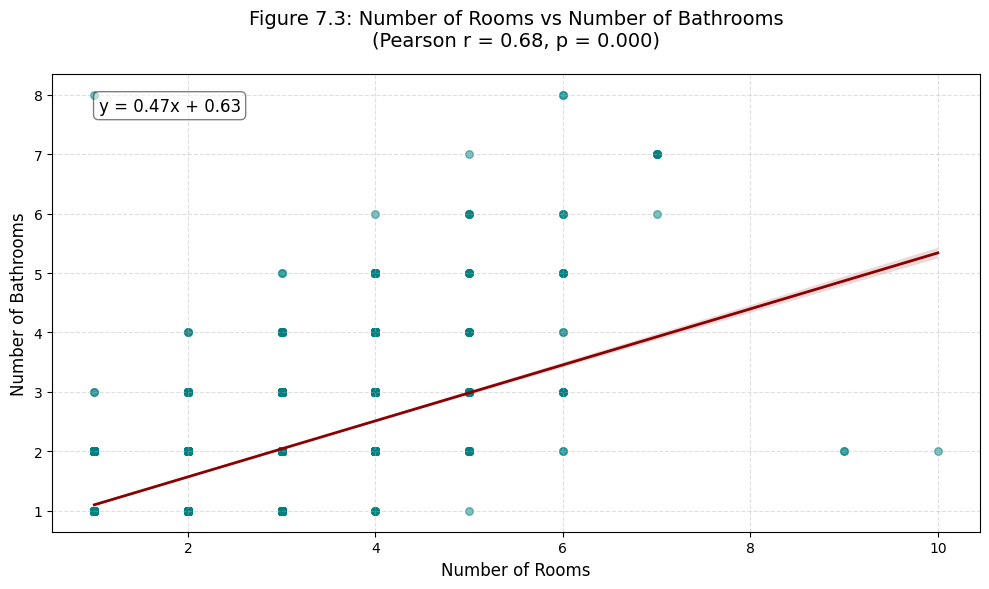

In [ ]:
from sklearn.linear_model import LinearRegression

# Prepare data
X = df_filtered['rooms'].values.reshape(-1, 1)
y = df_filtered['bathroom'].values

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)
slope = model.coef_[0]
intercept = model.intercept_

# Calculate Pearson correlation coefficient and p-value
r, p = pearsonr(df_filtered['rooms'], df_filtered['bathroom'])

# Plot
plt.figure(figsize=(10, 6))
sns.regplot(
    x='rooms',
    y='bathroom',
    data=df_filtered,
    scatter_kws={'alpha': 0.5, 's': 30, 'color': 'teal'},
    line_kws={'color': 'darkred', 'linewidth': 2}
)

# Display linear equation
eq_text = f"y = {slope:.2f}x + {intercept:.2f}"
plt.text(
    0.05, 0.95, eq_text,
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.5)
)

# Plot settings
plt.title(f"Figure 7.3: Number of Rooms vs Number of Bathrooms\n(Pearson r = {r:.2f}, p = {p:.3f})", fontsize=14, pad=20)
plt.xlabel("Number of Rooms", fontsize=12)
plt.ylabel("Number of Bathrooms", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


Figure 3 presents a scatter plot illustrating the relationship between the number of rooms and the number of bathrooms within properties. A clear upward-sloping regression line demonstrates a distinct positive association: as the number of rooms in a property increases, the number of bathrooms also tends to increase.
This relationship is quantified by a Pearson correlation coefficient of r = 0.68, indicating a strong positive linear correlation between the two variables. The p-value of 0.000 further confirms that this observed correlation is highly statistically significant, meaning it's very unlikely to have occurred by chance. The data points generally cluster around the trend line, reinforcing this strong association.

Explanation: This section visualizes the relationship between the number of rooms and bathrooms using a scatter plot with a linear regression line, annotated with the Pearson correlation coefficient and p-value.

## **Part 8: Predictive Modelling**

Since there are more than one variables which has a strong correlation with monthly rent, a multiple linear regression model will be built to estimate monthly rent based on the property features - type of property, number of rooms, size, furnished status, number of facilities, and city (Kuala Lumpur or Selangor).

In [ ]:
# Import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [ ]:
# Clean data and remove outliers
df_clean = df.dropna(subset=['monthly_rent','property_type','rooms','size','furnished','facilities','city']).copy()
df_clean['facility_counts'] = df_clean['facilities'].apply(lambda x: len([f.strip() for f in x.split(',')]))

Q1 = df_clean['monthly_rent'].quantile(0.25)
Q3 = df_clean['monthly_rent'].quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df_clean.copy()
for col in ['monthly_rent','rooms','size','facility_counts']:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower) & (df_no_outliers[col] <= upper)]

In [ ]:
# One-hot encode categorical features and define X and y
continuous_vars = df_no_outliers[['rooms', 'size', 'facility_counts']]
property_encoded = pd.get_dummies(df_no_outliers['property_type'], drop_first = True, prefix='type')
city_encoded = pd.get_dummies(df_no_outliers['city'], drop_first = True, prefix='type')
furnish_encoded = pd.get_dummies(df_no_outliers['furnished'], drop_first = True, prefix='type')

X = pd.concat([continuous_vars, property_encoded, city_encoded, furnish_encoded], axis=1)
y = df_no_outliers['monthly_rent']

In [ ]:
# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization of training data (Z-score scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit linear regression on scaled training data
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Check training and testing score
training_score = model.score(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
rsquared_linear = r2_score(y_test, y_pred)

print("Training score is", np.round(training_score, 3))
print("Testing score is", np.round(rsquared_linear, 3))

Training score is 0.517
Testing score is 0.516


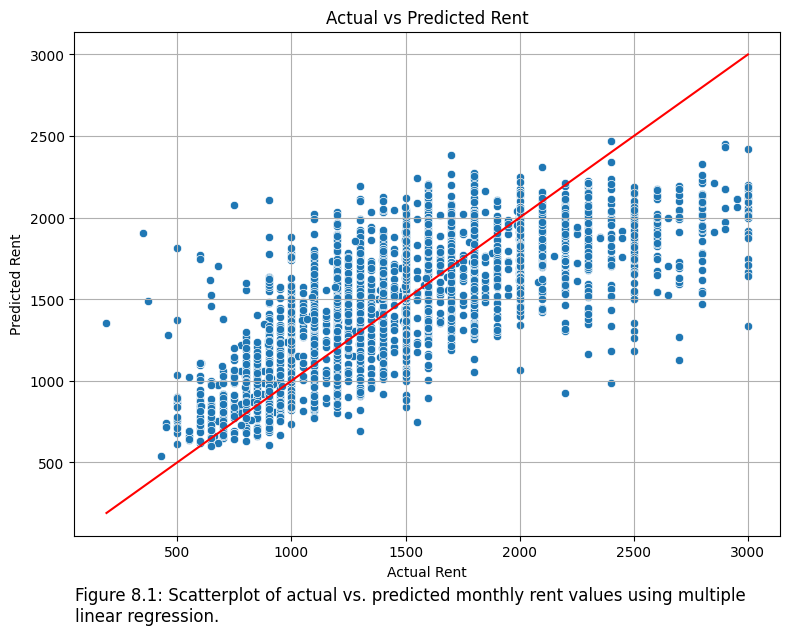

In [ ]:
# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-')  # perfect prediction line
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("Actual vs Predicted Rent")
plt.figtext(0.1, -0.04, 'Figure 8.1: Scatterplot of actual vs. predicted monthly rent values using multiple linear regression.',
            wrap=True, horizontalalignment='left', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

The scatterplot suggests that the linear model may not be able to capture the complexity of the data.
Additionally, since the training and testing score is relatively low (0.517 and 0.516 respectively), we will explore polynomial regression, which will allow the model to capture non-linear interactions between the variables. So now we will decide which degree is most suitable to be used.

In [ ]:
degrees = [1, 2, 3, 4]
for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_scaled, y_train)
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print(f"Degree {degree}: Train R² = {train_score:.3f}, Test R² = {test_score:.3f}")

Degree 1: Train R² = 0.517, Test R² = 0.516
Degree 2: Train R² = 0.533, Test R² = 0.532
Degree 3: Train R² = 0.564, Test R² = 0.545
Degree 4: Train R² = 0.584, Test R² = -5.490


Negative R² scores for degree 4 means that the model performs worse than simply predicting the mean of the target variable, which signals overfitting.

The improvement from degree 1 (0.517) to degree 3 (0.564) is noticeable but not dramatic, so polynomial helps but does not fully capture the complexity of the data. Degree 3 would be the best choice.

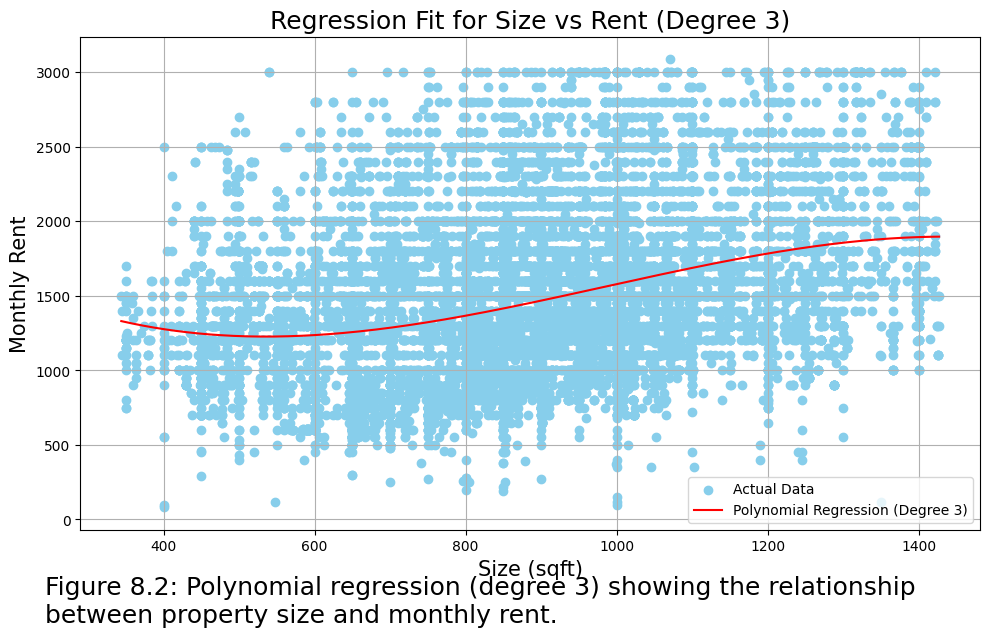

In [ ]:
# Select one feature and target
X = df_no_outliers[['size']]
y = df_no_outliers['monthly_rent']

# Create polynomial features
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)

# Fit model
model = LinearRegression()
model.fit(X_poly, y)

# Generate a smooth curve for plotting
X_plot = pd.DataFrame(np.linspace(X.min(), X.max(), 300).reshape(-1, 1), columns=['size'])
X_plot_poly = poly.transform(X_plot)
y_plot = model.predict(X_plot_poly)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='skyblue', label='Actual Data')
plt.plot(X_plot, y_plot, color='red', label=f'Polynomial Regression (Degree 3)')
plt.xlabel('Size (sqft)', fontsize=15)
plt.ylabel('Monthly Rent', fontsize=15)
plt.title(f'Regression Fit for Size vs Rent (Degree 3)', fontsize=18)
plt.figtext(0.05, -0.04, 'Figure 8.2: Polynomial regression (degree 3) showing the relationship between property size and monthly rent.',
            wrap=True, horizontalalignment='left', fontsize=18)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Figure 8.2 shows the polynomial regression plot of degree 3 between one of the variables used to train the model (property size) and the monthly rent. The blue dots show actual data points while the red curve shows the predicted monthly rent based on the polynomial regression model fitted on the data.

This plot and the R² values suggests that the relationship between the selected features (number of rooms, size, furnished status, number of facilities, and city (Kuala Lumpur or Selangor) and the monthly rent is non-linear, and a third-degree polynomial model captures this complexity more effectively than a simple linear model.

(For simplicity, only one feature is visualised)

###Explanation:

After comparing models with polynomial degrees from 1 to 5, we selected polynomial regression with Degree 3 as our final model. This choice was based on the balance between training and test performance, where Degree 3 achieved training R² of 0.564, and testing R² of 0.545. This indicates that the model explains approximately 56.4% of the variation in rent for known data and 54.5% for new data. The small difference between these scores suggests the model generalizes well and captures meaningful patterns in the data without significantly overfitting.

Overall, the model demonstrates reasonable predictive capability and provides a foundation for understanding key factors influencing rent prices in Kuala Lumpur and Selangor.


## **Part 9: Conclusion:**
#### The investigation reveals that rental prices are influenced by a variety of factors.

### **Key factors that affect rental prices include:**

#### 1. **Area and Cities** (Part 1-Nicole)
Rental prices vary significantly across different locations.  
Highest average rents were observed in Sri Hartamas (KL) and Beranang (Selangor), while lowest average rents were found in Chan Sow Lin (KL) and Banting (Selangor).  
However, sample size matters. Areas with fewer listings like Chan Sow Lin may produce less reliable averages.

#### 2. **Property Type** (Part 2-Christy)
Certain property types such as service residences and townhouse condominiums, tend to have higher rents than studio and apartment, largely due to size and exclusivity.

#### 3. **Size** (Part 3-Kar Li)
A positive correlation exists between property size and monthly rent, showing that properties with larger size usually fetch higher prices.

#### 4. **Furnishing Levels** (Part 4-Nafil)
Properties that are fully furnished command higher rents compared to those that are partially or unfurnished.
Furnishing acts as a price premium, especially in urban areas or for short-term rentals.

#### 5. **Age of Properties** (Part 5-Heidi)
Properties completed before 2015 tend to have higher average rents, reflecting the appreciation of property value over time, due to its location.

#### 6. **Facilities Offered** (Part 6-Min Ge)
Properties with more listed facilities (e.g., gym, pool, security) have higher rental price.
More facilities generally lead to higher perceived property value.

#### 7. **Number of Rooms and Bathrooms** (Part 7-Yin Haotian)
The number of rooms and bathrooms positively affects rent, whereby properties with more functional spaces are attractive to larger households and thus priced higher.

#### These findings highlight that rental prices are affected by a diverse range of factors. By understanding the 'why' behind rental costs, this study helps tenants, landlords or housing agents navigate the housing market with greater clarity and confidence.
